<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/9thTask-UTS/Ilham_Khodar_Trijaya_UTS_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Ilham Khodar Trijaya

NIM     : 1103213084

Tugas  : UTS ML 2024

Dataset : Credit Score Classification, train.csv

Referensi : https://www.kaggle.com/code/romanniki/guide-97-acc-clean-ftrs-ml-fr-xgb-fc-s/notebook

Dokumentasi ChatGPT : https://chat.openai.com/share/9378691a-5340-46b3-a66f-b2502d581e76

#**1. Impor Library**


In [164]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings
from sklearn.impute import SimpleImputer

warnings.filterwarnings("ignore", category=FutureWarning)

#**2. Memuat Data**


In [165]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [166]:
file_path = "/content/drive/MyDrive/Dataset/train.csv"
data = pd.read_csv(file_path)

<ipython-input-166-1ce208da1b53>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [167]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [168]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [169]:
data.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.673696,Poor


In [170]:
print("Informasi Data :")
data.info()
print("Deskripsi Data :")
data.describe()

Informasi Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [171]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

#**3. Membersihkan Data**


**3.1 Menyesuaikan Format Data**

In [172]:
#Age / Loans / Delayed Payments
data['Age'] = data['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data['Num_of_Loan'] = data['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

In [173]:
#Annual Income
data['Annual_Income'] = data['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
data['Annual_Income'] = data['Annual_Income'].astype(float)

In [174]:
#Outstanding Debt
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(str)
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
data['Outstanding_Debt'] = pd.to_numeric(data['Outstanding_Debt'], errors='coerce')
data['Outstanding_Debt'] = data['Outstanding_Debt'].fillna(0)

In [175]:
#Credit Limit
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].replace('_', np.nan)
data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(0)

In [176]:
#Invested Monthly
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(str)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace('', '0')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
data['Amount_invested_monthly'] = pd.to_numeric(data['Amount_invested_monthly'], errors='coerce')
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(0)

In [177]:
#Monthly Balance
data['Monthly_Balance'] = data['Monthly_Balance'].astype(str)
data['Monthly_Balance'] = data['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(0)

In [178]:
#Credit History Age
def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

data['Credit_History_Age_Months'] = data['Credit_History_Age'].apply(parse_years_and_months)

**3.2 Duplikasi Data**

In [179]:
# Menghitung jumlah baris sebelum menghapus duplikasi
jumlah_sebelum = len(data)

# Menghapus duplikasi berdasarkan semua kolom
data = data.drop_duplicates()

# Menghitung jumlah baris setelah menghapus duplikasi
jumlah_sesudah = len(data)

# Menampilkan pesan jika ada atau tidak ada duplikasi data
if jumlah_sesudah < jumlah_sebelum:
    print("Duplikasi data telah dihapus. Jumlah baris sebelum: {}, jumlah baris setelah: {}.".format(jumlah_sebelum, jumlah_sesudah))
else:
    print("Tidak ada duplikasi data dalam dataset.")

Tidak ada duplikasi data dalam dataset.


**3.3 Data Scaling**

In [180]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


In [181]:
# Kolom-kolom yang akan di-scale outlier
columns_to_scale = ['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income',
                    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                    'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']

# Membuat objek RobustScaler
scaler = RobustScaler()

# Melakukan scaling outlier pada kolom-kolom tertentu
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [182]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,684.757313,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,100000.0,2.603191,26.805295,-0.573237,-0.339770,0.000000,0.660230,453.008327
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,2.772820,29.351209,-1.750000,-0.750000,0.000000,0.250000,448.000000
Num_Credit_Card,100000.0,5.824810,43.019137,-1.666667,-0.333333,0.000000,0.666667,498.000000
Interest_Rate,100000.0,4.955503,38.868552,-1.000000,-0.416667,0.000000,0.583333,482.000000
Num_of_Loan,100000.0,1.940490,15.447483,-0.750000,-0.250000,0.000000,0.750000,373.250000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,1.577941,21.811481,-1.300000,-0.500000,0.000000,0.500000,438.400000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000


**3.4 Data Entry Plus**


3.4.1 Filtering Trash

In [183]:
# Filter nilai '!@9#%8' pada kolom 'Payment_Behaviour'
data = data[data['Occupation'] != '!@9#%8']

# Filter nilai '_______' pada kolom 'Occupation'
data = data[data['Occupation'] != '_______']

# Menghapus nilai NaN dari kolom 'Occupation'
data = data.dropna(subset=['Occupation'])

# Menampilkan unique values setelah filter dan penghapusan nilai NaN
print(data['Occupation'].unique())


['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [184]:
# Filter nilai '_______' pada kolom 'Credit_Mix'
data = data[data['Credit_Mix'] != '_']

# Menghapus nilai NaN dari kolom 'Credit_Mix'
data = data.dropna(subset=['Credit_Mix'])

# Menampilkan unique values setelah filter dan penghapusan nilai NaN
print(data['Credit_Mix'].unique())


['Good' 'Standard' 'Bad']


3.4.2 Nilai Negatif

In [185]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    data = data[data[column] >= 0]

3.4.3 Dropping Columns

In [186]:
print(data.columns)

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')


In [187]:
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age','Monthly_Inhand_Salary', 'Type_of_Loan']

data.drop(columns=columns_to_drop, inplace=True)

**3.5 Missing Values**


In [188]:
# Mengganti missing values dengan nilai 0
data.fillna(0, inplace=True)

missing_values = data.isnull().sum()
print("Jumlah missing values di setiap kolom:")
print(missing_values)

Jumlah missing values di setiap kolom:
Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64


#**4. Features Engineering**


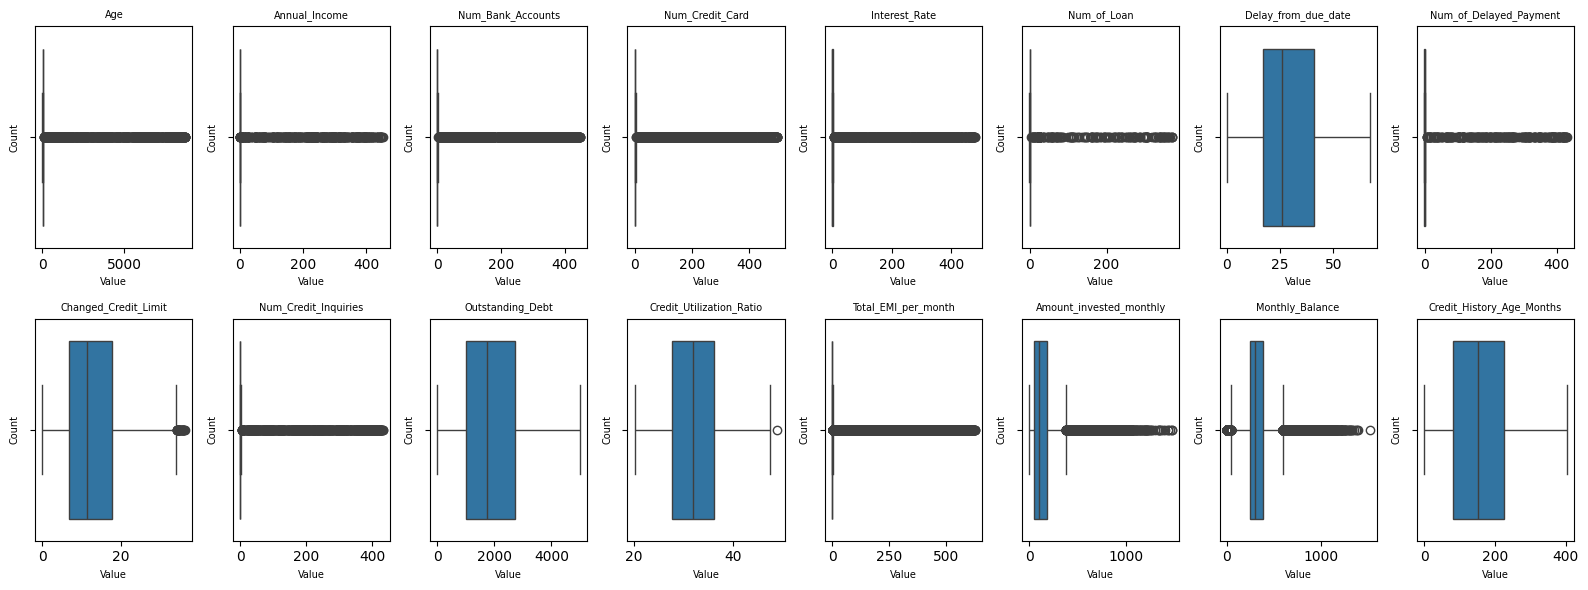

In [189]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**4.1 Scaling 2.0**

In [190]:
data = data[data['Age'] < 60]
data = data[data['Num_Credit_Card'] <= 10]
data = data[data['Interest_Rate'] <= 50]
data = data[data['Num_of_Loan'] <= 12]
data = data[data['Num_Bank_Accounts'] <= 10]
data = data[data['Delay_from_due_date'] <= 60]
data = data[data['Changed_Credit_Limit'] <= 30]
data = data[data['Num_Credit_Inquiries'] <= 12]
data = data[data['Total_EMI_per_month'] <= 200]
data = data[data['Outstanding_Debt'] <= 1500]

**4.2 Encode**

4.2.1 Label Encode

In [191]:
categories = ['Poor', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
data['Credit_Score_Encoded'] = encoder.fit_transform(data[['Credit_Score']])

In [192]:
print(data['Credit_Score_Encoded'])

32       1.0
33       1.0
37       1.0
38       1.0
96       1.0
        ... 
99934    0.0
99936    1.0
99940    1.0
99941    0.0
99942    0.0
Name: Credit_Score_Encoded, Length: 13350, dtype: float64


In [193]:
label_encoder = LabelEncoder()
data['Occupation_Encoded'] = label_encoder.fit_transform(data['Occupation'])

4.2.2 Ordinal Encode

In [194]:
categories = ['Bad', 'Standard', 'Good']
encoder = OrdinalEncoder(categories=[categories])
data['Credit_Mix_Encoded'] = encoder.fit_transform(data[['Credit_Mix']])

In [195]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])
data['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(data[['Payment_Behaviour']])

ValueError: Found unknown categories ['!@9#%8'] in column 0 during fit

In [196]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
data.drop(columns=columns_to_drop, inplace=True)

**4.3 New Fitur**

It might help to increase % of accuracy and reduce amount of errors.

In [197]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)
data['Total_Num_Accounts'] = data['Num_Bank_Accounts'] + data['Num_Credit_Card']

# Calculate the total outstanding debt per account
data['Debt_Per_Account'] = data['Outstanding_Debt'] / data['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income
data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']

# Calculate the total number of delayed payments per account
data['Delayed_Payments_Per_Account'] = data['Num_of_Delayed_Payment'] / data['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)
data['Total_Monthly_Expenses'] = data['Total_EMI_per_month'] + data['Amount_invested_monthly']

**4.4 MI Score**

In [198]:
categorical_columns = data.select_dtypes(include=['object']).columns

data_encoded = data.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains NaN.

In [199]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

# **5. Correlation Matrix**

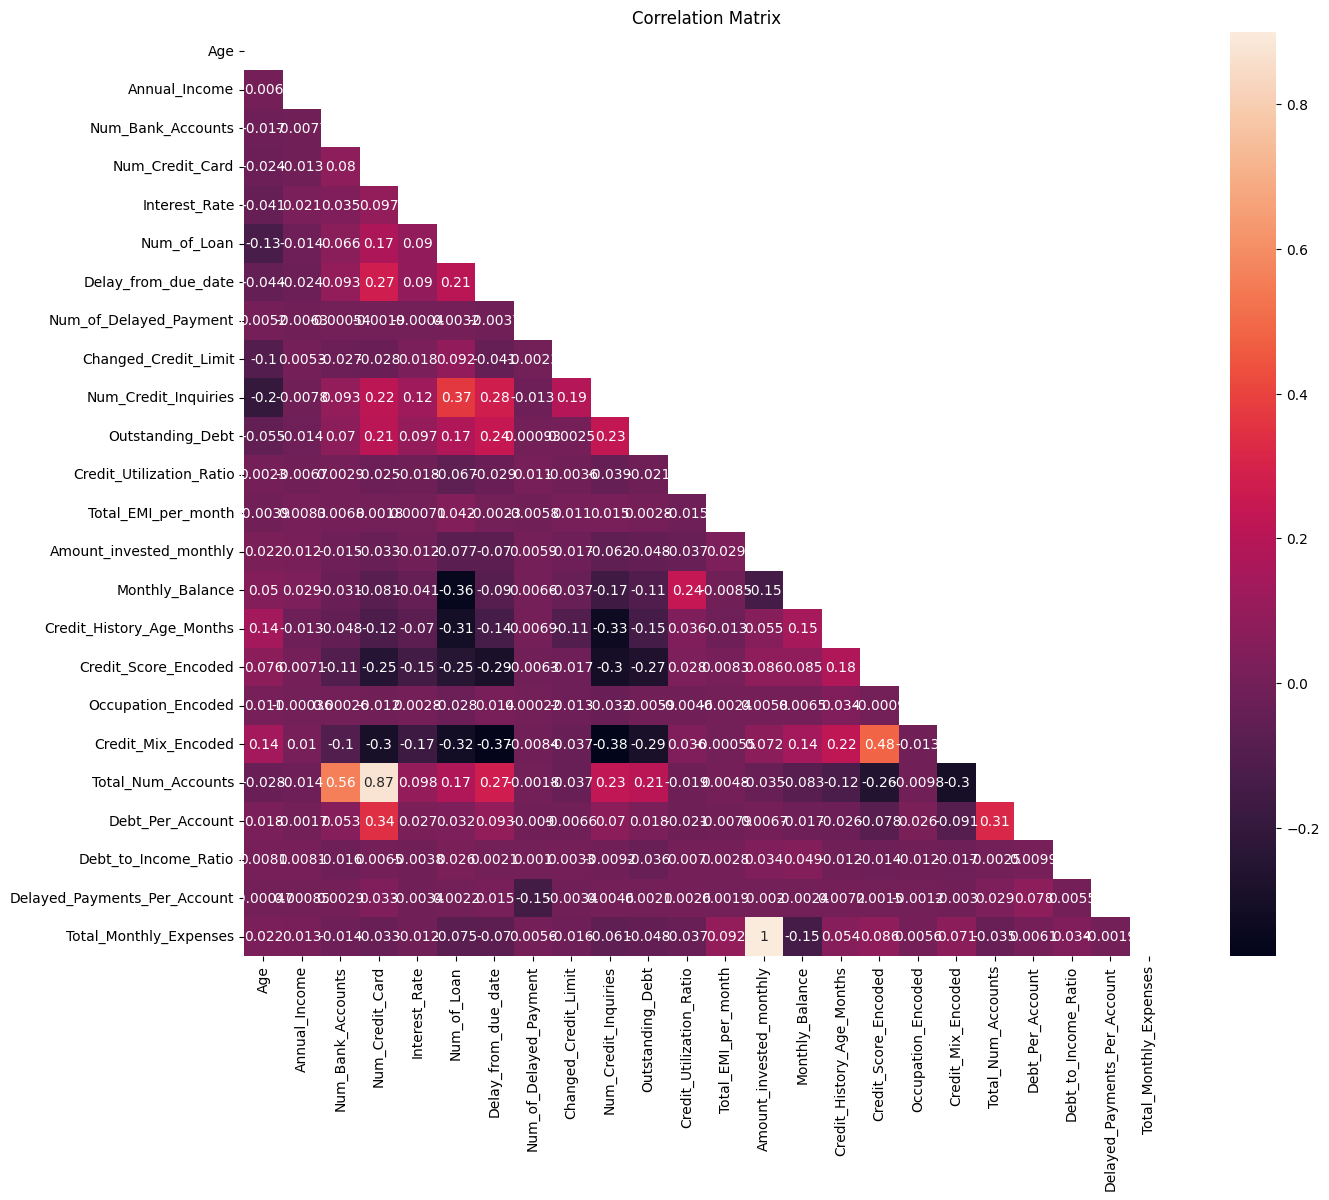

In [200]:
corr = data.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

# **6. Model Data**

In [201]:
y = data['Credit_Score_Encoded']

X = data[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_History_Age_Months', 'Credit_Mix_Encoded']]

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

**6.1 Random Forest**

In [202]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_data, y_data)

RandomForestRegressor(n_estimators=500, random_state=77)

6.1.1 MSE

In [203]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.12689321484306182


**6.2 XGBoost**

In [204]:
xgb_model = XGBRegressor(n_estimators=3500, learning_rate=0.05, random_state=77)
xgb_model.fit(X_data, y_data)

y_pred_xgb = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_xgb)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.13797054982990523


**6.3 Accuracy Test**

Accuracy on original test set: 0.8404494382022472

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.78      0.68      0.72       453
         1.0       0.87      0.92      0.89      1933
         2.0       0.67      0.58      0.62       284

    accuracy                           0.84      2670
   macro avg       0.77      0.72      0.75      2670
weighted avg       0.84      0.84      0.84      2670



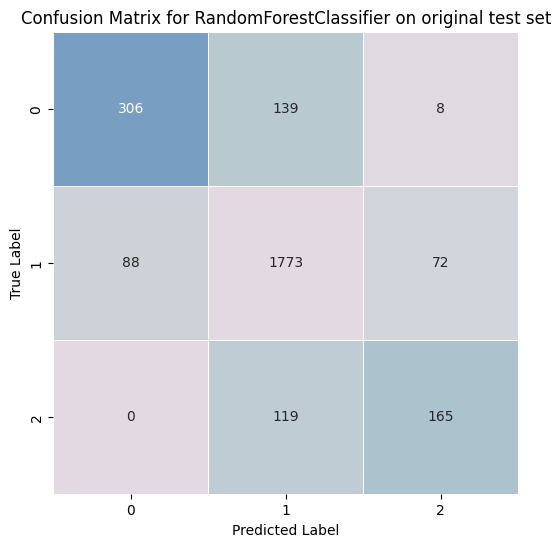

In [205]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_data, y_data)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))